# CNN(畳み込みニューラルネットワーク)によるCIFAR10 分類

In [3]:
def unpickle(file):
    import pickle
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

def load_cifar():
    x_train = np.array([])
    y_train = np.array([])
    for i in range(1,6):
        load_data = unpickle('cifar-10-batches-py/data_batch_{}'.format(i))
        if x_train.shape[0] == 0:
            x_train = load_data[b'data']
            y_train = load_data[b'labels']
        else:
            x_train = np.append(x_train,load_data[b'data'],axis=0)
            y_train = np.append(y_train,load_data[b'labels'],axis=0)
    load_data = unpickle('cifar-10-batches-py/test_batch')
    x_test = load_data[b'data']
    y_test = load_data[b'labels']
    return ((x_test,y_test),(x_train,y_train))

In [5]:
(x_test,y_test),(x_train,y_train) = load_cifar()

In [6]:
nb_classes = 10
y_train = np_utils.to_categorical(y_train, nb_classes)
y_test = np_utils.to_categorical(y_test, nb_classes)
print(y_train.shape)


(50000, 10)


In [7]:
x_train = x_train.reshape(50000,3,-1).swapaxes(1,2)
x_train  = x_train.reshape(50000,32,32,-1)
x_test = x_test.reshape(10000,3,-1).swapaxes(1,2)
x_test  = x_test.reshape(10000,32,32,-1)

In [8]:
x_train = x_train/255.0
x_test = x_test/255.0

[b'airplane', b'automobile', b'bird', b'cat', b'deer', b'dog', b'frog', b'horse', b'ship', b'truck']


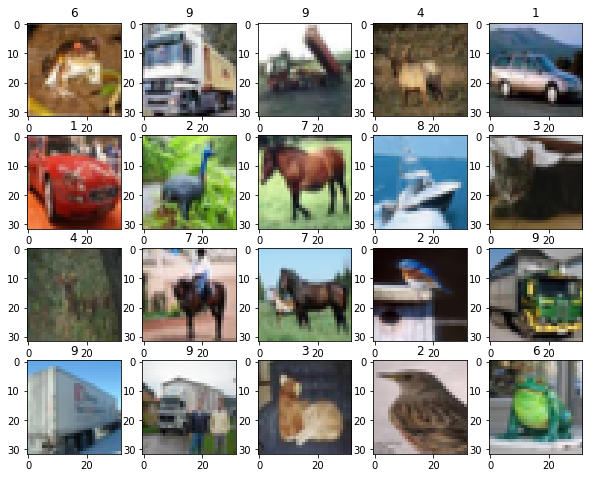

In [9]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 
    
load_data = unpickle('cifar-10-batches-py/data_batch_1')
b_meta = unpickle('cifar-10-batches-py/batches.meta')

label_names = b_meta[b'label_names']
print(label_names)
l = load_data[b'labels']
d = load_data[b'data']

plt.figure(figsize=(10,10))
for i in range(20):    
    plt.subplot(5,5,i+1)
    plt.imshow(d[i].reshape(3,-1).T.reshape(32,32,-1))
    plt.title(l[i])
plt.show()

In [10]:
def select_data(label_list):
    label_name_dict = {i.decode('utf-8'):e for e,i in enumerate(label_names)}
    print(label_name_dict)
    train_labels = np.array([np.argmax(i) for i in y_train])
    test_labels = np.array([np.argmax(i) for i in y_test])
    X_train = []
    for i in label_list:
        label_num = label_name_dict[i]
        if X_train == []:
            X_train = x_train[np.where(train_labels==label_num)]
            X_test = x_test[np.where(test_labels==label_num)]
            Y_train = y_train[np.where(train_labels==label_num)]
            Y_test = y_test[np.where(test_labels==label_num)]
        else:
            X_train = np.append(X_train,x_train[np.where(train_labels==label_num)],axis=0)
            X_test = np.append(X_test,x_test[np.where(test_labels==label_num)],axis=0)
            Y_train = np.append(Y_train,y_train[np.where(train_labels==label_num)],axis=0)
            Y_test = np.append(Y_test,y_test[np.where(test_labels==label_num)],axis=0)
            
    return ((X_train,Y_train),(X_test, Y_test))


In [11]:
(X_train,Y_train),(X_test,Y_test) = select_data(['dog','airplane','bird','cat','automobile','deer','frog','horse','ship','truck'])

{'airplane': 0, 'automobile': 1, 'bird': 2, 'cat': 3, 'deer': 4, 'dog': 5, 'frog': 6, 'horse': 7, 'ship': 8, 'truck': 9}


/Users/kazuki/.pyenv/versions/3.6.1/lib/python3.6/site-packages/ipykernel_launcher.py:9: DeprecationWarning: elementwise == comparison failed; this will raise an error in the future.
  if __name__ == '__main__':


In [13]:
X_train.shape

(50000, 32, 32, 3)

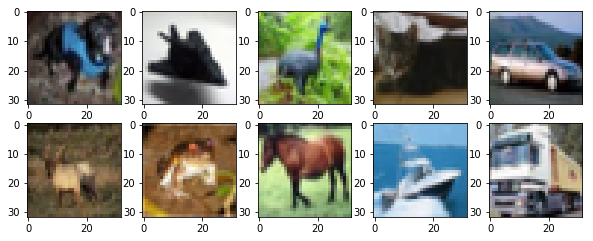

In [15]:
plt.figure(figsize=(10,10))
for i in range(10):
    plt.subplot(5,5,i+1)
    plt.imshow(X_train[i*5000])
plt.show()

In [16]:
import numpy as np
import matplotlib.pyplot as plt

from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator

nb_classes=10

# CNNを構築
model = Sequential()

# 畳み込み 3*3 -> 32 channels
model.add(Conv2D(32, (3, 3), padding='same', input_shape=X_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
# Max pooling 2*2
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# model.add(Conv2D(64, (3, 3), padding='same'))
# model.add(Activation('relu'))
# model.add(Conv2D(64, (3, 3)))
# model.add(Activation('relu'))
# model.add(MaxPooling2D(pool_size=(2, 2)))
# model.add(Dropout(0.25))

# 全結合 512
model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))

# 全結合 10
model.add(Dense(nb_classes))
model.add(Activation('softmax'))

model.compile(loss='categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 7200)              0         
__________

## データオーギュメンテーション

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

# 画像の水増し操作
datagen = ImageDataGenerator(
    featurewise_center=False,
    samplewise_center=False,
    featurewise_std_normalization=False,
    samplewise_std_normalization=False,
    zca_whitening=False,
    rotation_range=180.,
    width_shift_range=0.,
    height_shift_range=0.,
    shear_range=0.,
    zoom_range=0.,
    channel_shift_range=0.,
    fill_mode='nearest',
    cval=0.,
    horizontal_flip=True,
    vertical_flip=False,
    rescale=None,
    dim_ordering=K.image_dim_ordering())

#  水増し画像を訓練用画像の形式に合わせる
datagen.fit(X_train)

In [17]:
batch_size = 64
nb_epoch = 3
history = model.fit(X_train, Y_train,
                            batch_size=batch_size,
                            epochs=nb_epoch,
                            verbose=1,
                            validation_data=(X_test, Y_test),
                            shuffle=True)

Train on 50000 samples, validate on 10000 samples
Epoch 1/3
50000/50000 [==============================] - 249s - loss: 1.4394 - acc: 0.4831 - val_loss: 1.1107 - val_acc: 0.6108
Epoch 2/3
50000/50000 [==============================] - 264s - loss: 1.0856 - acc: 0.6152 - val_loss: 1.0034 - val_acc: 0.6488
Epoch 3/3
50000/50000 [==============================] - 267s - loss: 0.9350 - acc: 0.6698 - val_loss: 0.9034 - val_acc: 0.6825


(1, 32, 32, 3)
[[  4.69435632e-01   7.99126792e-06   4.45227712e-01   1.10562987e-05
    6.77283242e-06   8.52824822e-02   7.16229533e-06   4.26837960e-06
    4.55015334e-06   1.24842381e-05]] 
 airplane


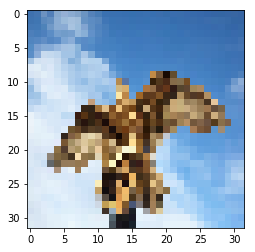

In [181]:
from PIL import Image
import matplotlib.pyplot as plt
import numpy as np

#Jupyterでインライン表示するための宣言
%matplotlib inline 

#画像の読み込み
test = Image.open("./bird3.jpg")


# gray_img = im.convert('L')
test = test.resize((32,32))
plt.imshow(test)

# #画像をarrayに変換
test_array = np.array(test, 'f')
test_array /= 255.
test_array = test_array[np.newaxis]
print(test_array.shape)

# im_list = 1 - im_list/256

res = np.argmax(model.predict(test_array)[0])
l_dict = {e:i.decode('utf-8') for e,i in enumerate(label_names)}
print(model.predict(test_array),'\n',l_dict[res])